In [1]:
import torch
import torch.optim

import CIFAR_v2 as C

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
model = C.CIFARAutoEncoderV2(256).to(device)
epoch_enc = 0
epoch_dec = 0
train_load, test_load = C.get_cifar_loaders(download=True)
opt_enc = torch.optim.Adam(model.classifier.parameters(), lr=0.001)
opt_dec = torch.optim.Adam(model.decoder.parameters(), lr=0.001)

Files already downloaded and verified


In [7]:
for _ in range(15):
    C.train_encoder(model, device, train_load, opt_enc, epoch_enc)
    C.test_encoder(model, device, test_load)
    epoch_enc += 1

Train Epoch: 15 [0/50000 (0%)]	Loss: 0.183292
Train Epoch: 15 [4000/50000 (8%)]	Loss: 0.090923
Train Epoch: 15 [8000/50000 (16%)]	Loss: 0.153999
Train Epoch: 15 [12000/50000 (24%)]	Loss: 0.007204
Train Epoch: 15 [16000/50000 (32%)]	Loss: 0.149736
Train Epoch: 15 [20000/50000 (40%)]	Loss: 0.021195
Train Epoch: 15 [24000/50000 (48%)]	Loss: 0.600475
Train Epoch: 15 [28000/50000 (56%)]	Loss: 0.032811
Train Epoch: 15 [32000/50000 (64%)]	Loss: 0.314300
Train Epoch: 15 [36000/50000 (72%)]	Loss: 0.101222
Train Epoch: 15 [40000/50000 (80%)]	Loss: 0.194106
Train Epoch: 15 [44000/50000 (88%)]	Loss: 0.094803
Train Epoch: 15 [48000/50000 (96%)]	Loss: 0.055893

Test set: Average loss: 1.5349, Accuracy: 7193/10000 (72%)

Train Epoch: 16 [0/50000 (0%)]	Loss: 0.185228
Train Epoch: 16 [4000/50000 (8%)]	Loss: 0.048901
Train Epoch: 16 [8000/50000 (16%)]	Loss: 0.548875
Train Epoch: 16 [12000/50000 (24%)]	Loss: 0.016617
Train Epoch: 16 [16000/50000 (32%)]	Loss: 0.056209
Train Epoch: 16 [20000/50000 (40%)]	L

Train Epoch: 26 [28000/50000 (56%)]	Loss: 0.004550
Train Epoch: 26 [32000/50000 (64%)]	Loss: 0.301254
Train Epoch: 26 [36000/50000 (72%)]	Loss: 0.007449
Train Epoch: 26 [40000/50000 (80%)]	Loss: 0.060061
Train Epoch: 26 [44000/50000 (88%)]	Loss: 0.031669
Train Epoch: 26 [48000/50000 (96%)]	Loss: 0.527349

Test set: Average loss: 1.7816, Accuracy: 7131/10000 (71%)

Train Epoch: 27 [0/50000 (0%)]	Loss: 0.059691
Train Epoch: 27 [4000/50000 (8%)]	Loss: 0.005854
Train Epoch: 27 [8000/50000 (16%)]	Loss: 0.011611
Train Epoch: 27 [12000/50000 (24%)]	Loss: 0.059132
Train Epoch: 27 [16000/50000 (32%)]	Loss: 0.024792
Train Epoch: 27 [20000/50000 (40%)]	Loss: 0.140473
Train Epoch: 27 [24000/50000 (48%)]	Loss: 0.230041
Train Epoch: 27 [28000/50000 (56%)]	Loss: 0.043029
Train Epoch: 27 [32000/50000 (64%)]	Loss: 0.018851
Train Epoch: 27 [36000/50000 (72%)]	Loss: 0.105445
Train Epoch: 27 [40000/50000 (80%)]	Loss: 0.069807
Train Epoch: 27 [44000/50000 (88%)]	Loss: 0.075826
Train Epoch: 27 [48000/50000 

In [52]:
for _ in range(777):
    C.train_decoder(model, device, train_load, opt_dec, epoch_dec)
    C.test_decoder(model, device, train_load)
    epoch_dec += 1

Train Epoch: 395 [0/50000 (0%)]	Loss: 0.566641


KeyboardInterrupt: 

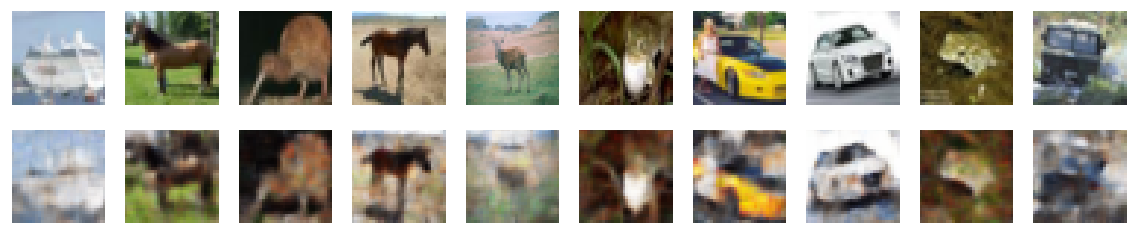

In [59]:
C.show_true_and_recreated_imgs(model, train_load, device)

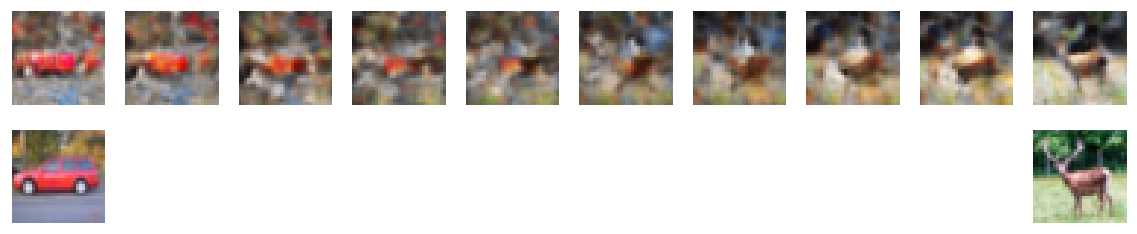

In [58]:
C.show_transition(model, train_load, device)

In [56]:
with open('cifar-v2-model-4.pth', 'wb') as f:
    torch.save(model, f)

In [5]:
model2 = torch.load('cifar-v2-model-4.pth').to(device)

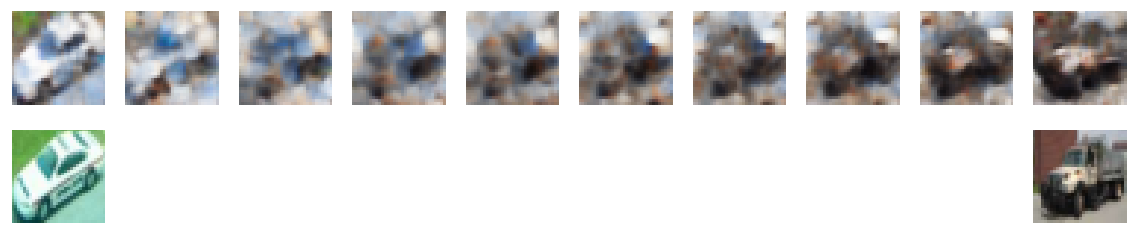

In [6]:
C.show_transition(model2, train_load, device)